# 05 - Nyquist-Shannon Theorem
Lecture 05 - 27 September 2021

## Sampling
Given a continuous function $x_A(t)$, it is always possible to generate a discrete sequence by taking $x[n]=x_A(nT)$, where $T$ is the sampling time. A question should naturally arise: how good is it possible to reconstruct a signal $x_{A}(t)$ from its sampled sequence?
A first way to do that is to linearly interpolate between points:

<IPython.core.display.Math object>

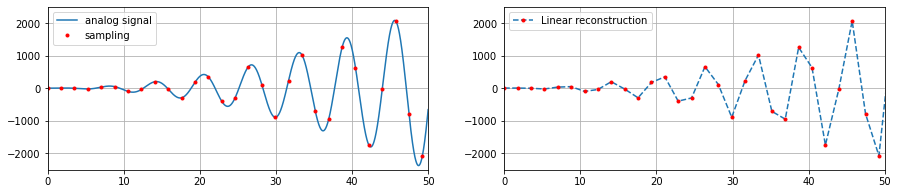

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 51, 10000)
ya= np.sin(x)*x**2 - np.cos(x)*np.log(x+0.1) + 3

n = np.linspace(0, 51, 30) # Change here the number of points
ys= np.sin(n)*n**2 - np.cos(n)*np.log(n+0.1) + 3


fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].plot(x, ya, label="analog signal")
ax[0].plot(n, ys, lw=0, marker='.', color='r', label="sampling")

ax[1].plot(n, ys, marker='.', linestyle="--", mfc='r', mec='r', label="Linear reconstruction")

ax[0].set_xlim(0, 50); ax[1].set_xlim(0, 50);
ax[0].set_ylim(-2500, 2500); ax[1].set_ylim(-2500, 2500);
ax[0].grid(); ax[1].grid();
ax[0].legend(); ax[1].legend()

from IPython.display import display, Math, Latex
display(Math(r'f(x) = sin(x)x^2 - cos(x) log(x+0.1) + 3 \qquad \text{in }[0,51] \text{ with } T=1.7 \text{ (30 points)}'))


but the results are not great. There exists an optimal way to reconstruct a function from the sampling, but it requires defining some quantities and making some rather general assumptions:

### Definitions:
- *Sampling period/time*: $T$
- *Sampling rate/frequency*: $f_s=T^{-1}$
- *Nyquist frequency*: $F_{NY}= \frac{f_s}{2} \quad \omega_{NY} = 2\pi f_{NY} = \pi f_s = \frac{\pi}{T}$
- *Nyquist band:* $f \in ]-f_{NY}; f_{NY}[ \quad \iff \quad f \in ]-\frac{\pi}{T}; \frac{\pi}{T}[$

### Assumptions
1. $x_A(t)$ is $\mathcal{L}^2$, that is, it has a Fourier Transform
2. $x[n]=x_{A}(nT)$ is _BIBO STABLE_ $\implies \Gamma_1 \in \text{ROC}\left\{ x(z) \right\}$

Let's start by writing the sampled signal in terms of the Fourier transform of the analog signal:

\begin{align*}
x_{s}[n] = x_A(nT)
&= \frac{1}{2\pi}\int_{-\infty}^{+\infty} \tilde{x}_A(\omega)e^{-i\omega Tn} d\omega \\
&= \frac{1}{2\pi} \sum_{k=-\infty}^{+\infty} \int_{-\frac{\pi}{T}+\frac{2\pi}{T}k}^{\frac{\pi}{T}+\frac{2\pi}{T}k} \tilde{x}_A(\omega)e^{-i\omega Tn} d\omega \qquad \omega'=\omega-\frac{2\pi}{T}k\\
&= \frac{1}{2\pi} \sum_{k=-\infty}^{+\infty} \int_{-\frac{\pi}{T}}^{\frac{\pi}{T}} \tilde{x}_A\left(\omega'+\frac{2\pi}{T}k\right)e^{-i\left(\omega'+\frac{2\pi}{T}k\right) Tn} d\omega'
\qquad e^{\frac{2\pi}{T}k Tn}=1 \\
&= \frac{1}{2\pi} \int_{-\frac{\pi}{T}}^{\frac{\pi}{T}} \sum_{k=-\infty}^{+\infty} \tilde{x}_A\left(\omega'+\frac{2\pi}{T}k\right)e^{-i\omega' Tn} d\omega'
\end{align*}

At the same time, the sequence $x_s[n]$ can be expressed via the inverse z-transform around $\Gamma_1$ clockwise:

![Circonference Gamma 1 travelled clockwise](images/21-09-27_Gamma1_clockwise.jpg)

\begin{align*}
x_{s}[n] &= \frac{1}{2\pi i} \oint_{\Gamma \in ROC} x_s(z) z^{n-1} \qquad z=e^{-i\omega t} \qquad dz=(-iT)e^{-i\omega T}\\
&= - \frac{1}{2\pi i} \oint_{-\frac{\pi}{T}}^{\frac{\pi}{T}} x_s(e^{-i\omega t}) e^{-i\omega T (n-1)} (-iT) e^{-i\omega t} d\omega \\
&= \frac{T}{2\pi} \oint_{-\frac{\pi}{T}}^{\frac{\pi}{T}} x_s(e^{-i\omega t}) e^{-i\omega n T} d\omega\\
\end{align*}

By composing this expression with the one obtained above it is possible to obtain:
```{admonition} Nyquist-Shannon precursor theorem
$T x_s\left(z=e^{-i\omega T}\right) = \sum_{k} \tilde{x}_A\left( \omega+\frac{2\pi}{T}k\right)$ with $\omega\in \left] -\frac{\pi}{T}; \frac{\pi}{T}\right[$
```

**WARNING:** The function on the right must be periodic with period $\frac{2\pi}{T}$ due to the nature of the complex exponential. In contrast, the function on the left wasn't assumed to be periodic so the expression can't be true in general. To circumvent this issue, we make a third assumption: 


3. Assume $x_A(t)$ to be _band limited_ on $\left] -\frac{\pi}{T}; \frac{\pi}{T}\right[$, that is $\tilde{x}_A(\omega)=0 \text{ if } \left| \omega\right| \geq \frac{\pi}{T}$.

This assumption allows us to unwrap the summation and force the equality in the precursor theorem:

\begin{align*}
    \require{cancel}
    T x_s\left(z=e^{-i\omega T}\right) =\tilde{x}_A\left( \omega\right) + \cancelto{0}{ \tilde{x}_A\left( \omega+\frac{2\pi}{T}\right) } +\ ...
\end{align*}


It is now time to go back to the time domain:
\begin{align*}
\require{color}
x_A(t) &= \frac{1}{2\pi}\int_{-\infty}^{+\infty} \tilde{x}_A(\omega)e^{-i\omega T} d\omega \qquad \text{exploit hypothesis 3.}\\
&= \frac{1}{2\pi}\int_{-\frac{\pi}{T}}^{+\frac{\pi}{T}} \tilde{x}_A(\omega)e^{-i\omega T} d\omega \qquad \text{use the precursor theorem}\\
&= \frac{1}{2\pi}\int_{-\frac{\pi}{T}}^{+\frac{\pi}{T}} T x_s(z=e^{-i\omega T}) e^{-i\omega T} d\omega
= \frac{T}{2\pi}\int_{-\frac{\pi}{T}}^{+\frac{\pi}{T}} \sum_{n} x_s[n]e^{i\omega n T -i\omega t} d\omega \\
&= \frac{T}{2\pi}\sum_{n} x_s[n] \int_{-\frac{\pi}{T}}^{+\frac{\pi}{T}} e^{i\omega n T -i\omega t} d\omega 
= \frac{T}{2\pi}\sum_{n} x_s[n] \int_{-\frac{\pi}{T}}^{+\frac{\pi}{T}} e^{i\omega (n T-t)} d\omega \\
&= \frac{T}{2\pi}\sum_{n} x_s[n] \left[ \frac{e^{i\omega(nT-t)}}{i(nT-t)} \right]^{\frac{\pi}{T}}_{-\frac{\pi}{T}} = \cancel{\frac{T}{2\pi}} \sum_{n} x_s[n] \frac{e^{i(nT-t)\frac{\pi}{T}}+e^{-i(nT-t)\frac{\pi}{T}}}{i(nT-t) \textcolor[rgb]{0.75,0.75,0.75}{\frac{2\pi}{T}} } \\
&= \sum_{n} x_s[n] sinc\left[ (nT-t)\frac{\pi}{T}\right]\\
\end{align*}

```{admonition} Nyquist-Shannon theorem in the time domain
$x_A(t)=\sum_{n} x_s[n] sinc\left[ (nT-t)\frac{\pi}{T}\right]$
```

The condition $\tilde{x}_A(\omega)=0$ if $\left|\omega\right|\geq \frac{\pi}{T}$ or $\left|f\right|\geq \frac{1}{2T}=f_{NY} \implies \max_f\left\{ \left|f\right|\right\}<\frac{1}{2T}=f_{NY}$.

## Aliasing
Let's now analyze what happens in the case of **undersampling**, that is, if $f_S < f_{NY}$.

### definitions
- *Reconstructed Signal*: $x_R(t)=\sum_{n} x_s[n] sinc\left[ (nT-t)\frac{\pi}{T}\right]$ with $x_s[n]=x_A(nT)$
- *Folding*: $x_F(\omega)=\sum_{n}\tilde{x}_A\left( \omega+\frac{2\pi}{T}k \right) \implies \tilde{x}_F(\omega)=T X_s(z=e^{-i\omega T})$
- *Window on Nyquist band*: $W(\omega)=\theta\left(\omega+\frac{\pi}{T}\right)-\theta\left(\omega-\frac{\pi}{T}\right)$
![Window on Nyquist band ](images/21-09-27_window.jpg)

- *Alias*: $\tilde{x}_{alias}(\omega)=W(\omega)\tilde{x}_F(\omega)$.

Properties of the alias function:
- It is $\pi/T$ band limited due to $W(\omega)$
- $\sum_n \tilde{x}_{alias}\left( \omega+\frac{2\pi}{T}k \right) = \sum_n \tilde{x}_{F}\left( \omega+\frac{2\pi}{T}k \right)W\left( \omega+\frac{2\pi}{T}k \right) = \tilde{x}_{F}\left( \omega\right)\cancelto{1}{\sum_nW\left( \omega+\frac{2\pi}{T}k \right)} \\
\implies \tilde{x}_{F}\left( \omega\right) = \sum_n \tilde{x}_{alias}\left( \omega+\frac{2\pi}{T}k \right) $
- If $\omega \in \left] -\frac{\pi}{T};\frac{\pi}{T} \right[$ 
$\implies$ $\tilde{x}_{alias}(\omega)=\tilde{x}_{F}(\omega) = T x_s\left( z=e^{-i\omega T} \right)$ 
$\implies$ $\mathcal{FT}^{-1}\left\{ \tilde{x}_{aliasing}(\omega) \right\} = x_R(t)= \sum_{n} x[n]sinc\left[ (t-nT)\frac{\pi}{T}\right]$

By assuming that $\tilde{x}_{alias}(\omega)$ is _band limited_ it is possible to obtain $\tilde{x}_{alias}(\omega)=\tilde{x}_{A}(\omega) \implies x_R(t)=x_A(t)$. On the other hand, if $\tilde{x}_{alias}(\omega)$ is _NOT_ band limited the reconstruction is not possible:
![Comparision between an unersampled signal and a properly samped one](images/21-09-27_over_under_sampling.jpeg)

```{warning}
DO NOT validate the goodness of a reconstruction on the sampled points as they are _always_ reconstructed perfectly:
$\lim_{t\rightarrow nT}sinc\left[(t-nT)\frac{\pi}{T}\right]=1 \implies x_R(t=nT)=x[n]\ \forall n$
```

### Exercise
Take $\mathcal{Re}\left\{e^{i\omega_0 t}\right\} = cos(\omega_0 t)$ with $\omega_0=2\pi f_0$ and sample it first with $T<\frac{1}{2f_0}$ and then with $T>\frac{1}{2f_0}$. Reconstruct the two signals and check the differences.